In [1]:
import os
import csv
import re

# 定义一个函数来处理单个文件
def process_file(file_path, result):
    with open(file_path, 'r') as f:
        data = f.readlines()

        # 使用正则表达式匹配数据行中的键和值
        for line in data:
            if line.startswith("all") or line.startswith("sway with") or \
            line.startswith("xpln on") or line.startswith("sort with"):
                # 匹配键
                key = ['CityMPG+_mean','Class-_mean','HighwayMPG+_mean','N_mean','Weight-_mean','CityMPG+_div','Class-_div','HighwayMPG+_div','N_div','Weight-_div']
                # 匹配值
                value = re.findall(r"[-+]?\d*\.\d+|\d+", line)
                value = [float(v) for v in value]
                # 存储在相应的字典中
                if line.startswith("all"):
                    for i, k in enumerate(key):
                        if k not in result["all"]:
                            result["all"][k] = []
                        result["all"][k].append(value[i])
                elif line.startswith("sway with"):
                    for i, k in enumerate(key):
                        if k not in result["sway with"]:
                            result["sway with"][k] = []
                        result["sway with"][k].append(value[i])
                elif line.startswith("xpln on"):
                    for i, k in enumerate(key):
                        if k not in result["xpln on"]:
                            result["xpln on"][k] = []
                        result["xpln on"][k].append(value[i])
                elif line.startswith("sort with"):
                    for i, k in enumerate(key):
                        if k not in result["sort with"]:
                            result["sort with"][k] = []
                        result["sort with"][k].append(value[i])


# 定义一个函数来处理一个文件夹
def process_folder(folder_path):
    data_dict = {'all':{},'sway with':{},'xpln on':{},'sort with':{}}

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.out'):
            file_path = os.path.join(folder_path, file_name)
            process_file(file_path, data_dict)

    return data_dict

# 处理所有文件夹
root_folder = './out2'
auto2_data = {}
for folder_path, _, file_names in os.walk(root_folder):
    folder_name = os.path.basename(folder_path)
    if folder_name == root_folder:
        continue
    folder_name = folder_name.split('.')[0]
    auto2_data[folder_name] = process_folder(folder_path)



In [39]:
import matplotlib.pyplot as plt
import numpy as np

def draw(col2s, col3s):
    fig = plt.figure(figsize =(8, 5))
    i = j =0

    for col2 in col2s: #rows
        i += 1
        j = 0
        for col3 in col3s: 
            j+=1
            d1 = auto2_data['auto2'][col2][col3]
            d2 = auto2_data['low_auto2'][col2][col3]
            d3 = auto2_data['high_auto2'][col2][col3]
            d4 = auto2_data['iter_low_auto2'][col2][col3]
            d5 = auto2_data['iter_high_auto2'][col2][col3]
            d6 = auto2_data['knn_low_auto2'][col2][col3]
            d7 = auto2_data['knn_high_auto2'][col2][col3]

            data = [d2,d4,d6]
            plt.subplot(4,4,(i-1)*8+j)
            plt.boxplot(data, labels=['ORIGIN','MICE','KNN'], flierprops={'marker': '+', 'markersize': 5})

            data = [d3,d5,d7]
            plt.subplot(4,4,(i-1)*8+j+4)
            plt.boxplot(data, labels=['ORIGIN','MICE','KNN'], flierprops={'marker': '+', 'markersize': 3})

    plt.tight_layout()    
    plt.show()

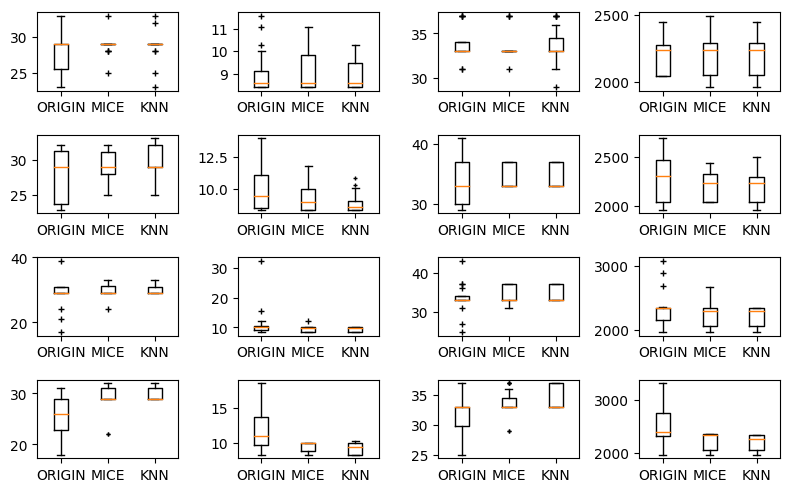

In [40]:
draw(['sway with','xpln on'],['CityMPG+_mean','Class-_mean','HighwayMPG+_mean','Weight-_mean'])

In [4]:
d1 = auto2_data['auto2']['sway with']['Weight-_mean']
d2 = auto2_data['low_auto2']['sway with']['CityMPG+_mean']
d3 = auto2_data['high_auto2']['sway with']['CityMPG+_mean']
d4 = auto2_data['iter_low_auto2']['sway with']['CityMPG+_mean']
d5 = auto2_data['iter_high_auto2']['sway with']['CityMPG+_mean']
d6 = auto2_data['knn_low_auto2']['sway with']['CityMPG+_mean']
d7 = auto2_data['knn_high_auto2']['sway with']['CityMPG+_mean']

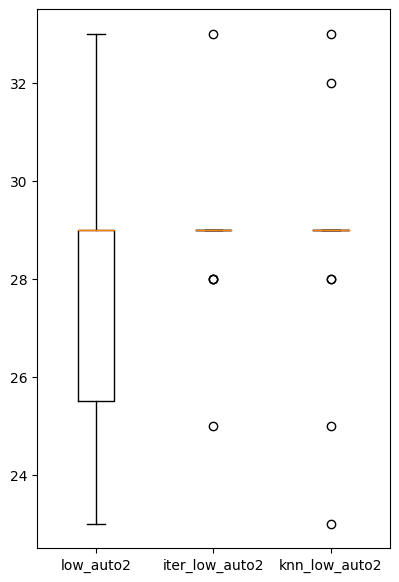

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data = [d2,d4,d6]
fig = plt.figure(figsize =(10, 7))
plt.subplot(1,2,1)
plt.boxplot(data, labels=['low_auto2','iter_low_auto2','knn_low_auto2'])
#plt.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])

plt.show()

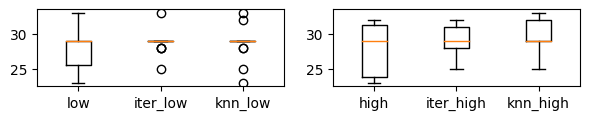

In [6]:
data = [d2,d4,d6]
fig = plt.figure(figsize =(7, 1))
plt.subplot(1,2,1)
plt.boxplot(data, labels=['low','iter_low','knn_low'])

data = [d3,d5,d7]
plt.subplot(1,2,2)
plt.boxplot(data, labels=['high','iter_high','knn_high'])
#plt.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])

plt.show()

/tmp/ipykernel_1889/1900996562.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])


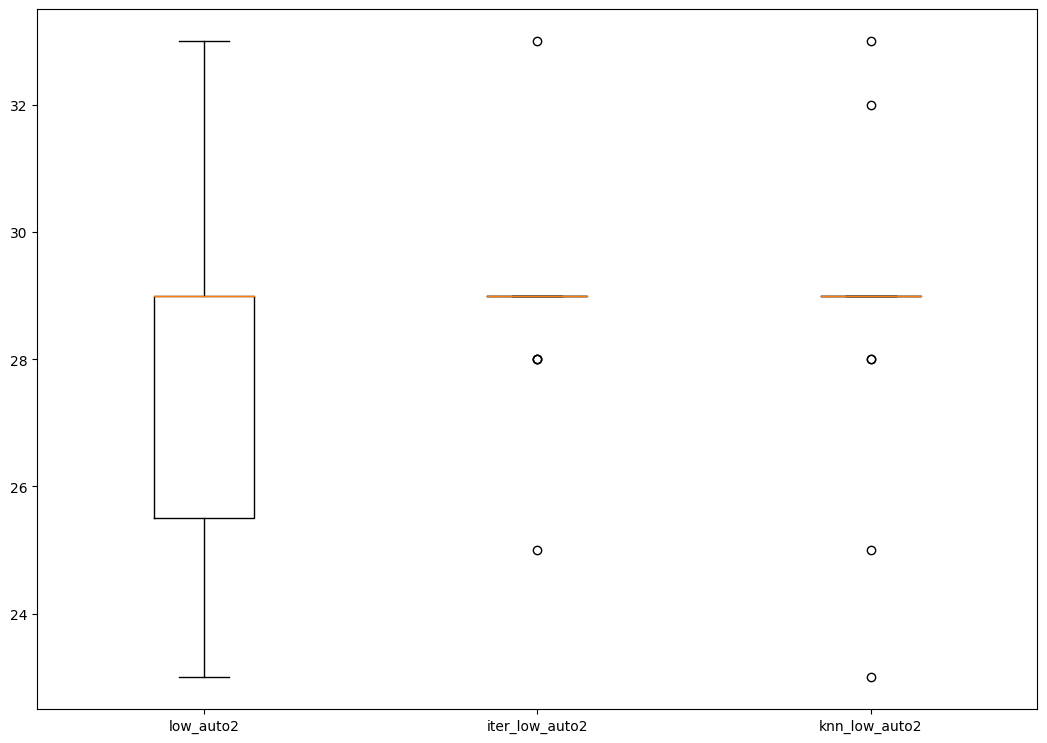

In [7]:
import matplotlib.pyplot as plt
import numpy as np

data = [d2,d4,d6]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])

bp = ax.boxplot(data)


plt.show()

/tmp/ipykernel_1889/1016865623.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])


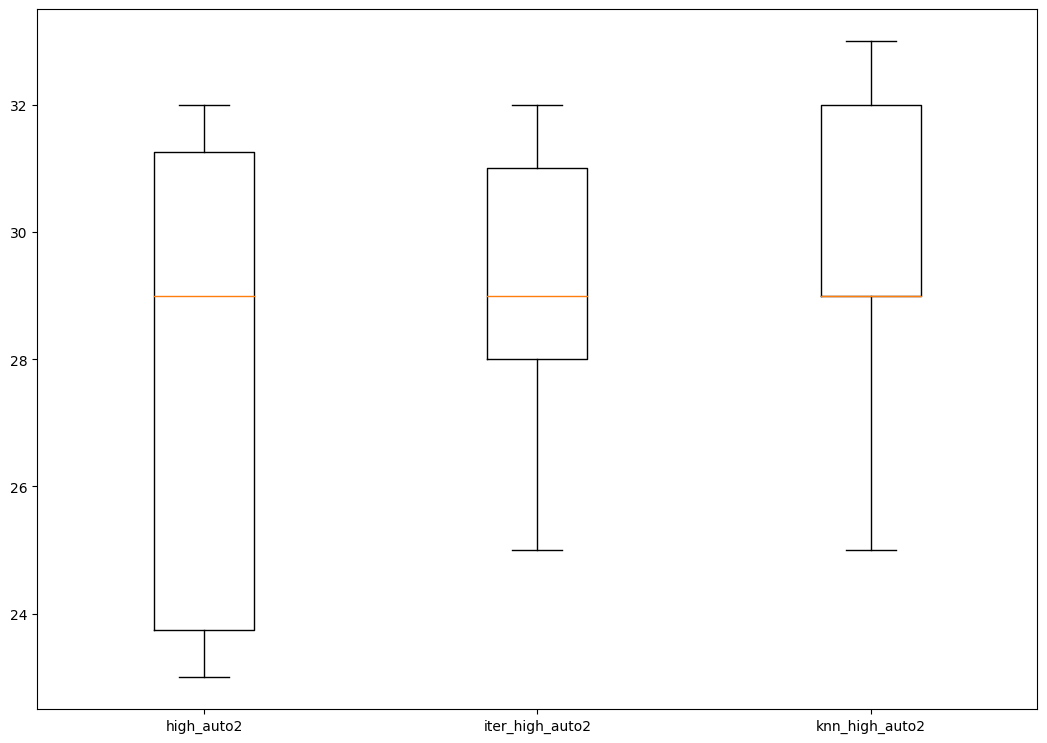

In [8]:
data = [d3,d5,d7]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])

bp = ax.boxplot(data)


plt.show()

In [9]:
d1 = auto2_data['auto2']['xpln on']['CityMPG+_mean']
d2 = auto2_data['low_auto2']['xpln on']['CityMPG+_mean']
d3 = auto2_data['high_auto2']['xpln on']['CityMPG+_mean']
d4 = auto2_data['iter_low_auto2']['xpln on']['CityMPG+_mean']
d5 = auto2_data['iter_high_auto2']['xpln on']['CityMPG+_mean']
d6 = auto2_data['knn_low_auto2']['xpln on']['CityMPG+_mean']
d7 = auto2_data['knn_high_auto2']['xpln on']['CityMPG+_mean']

/tmp/ipykernel_1889/3914002741.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])


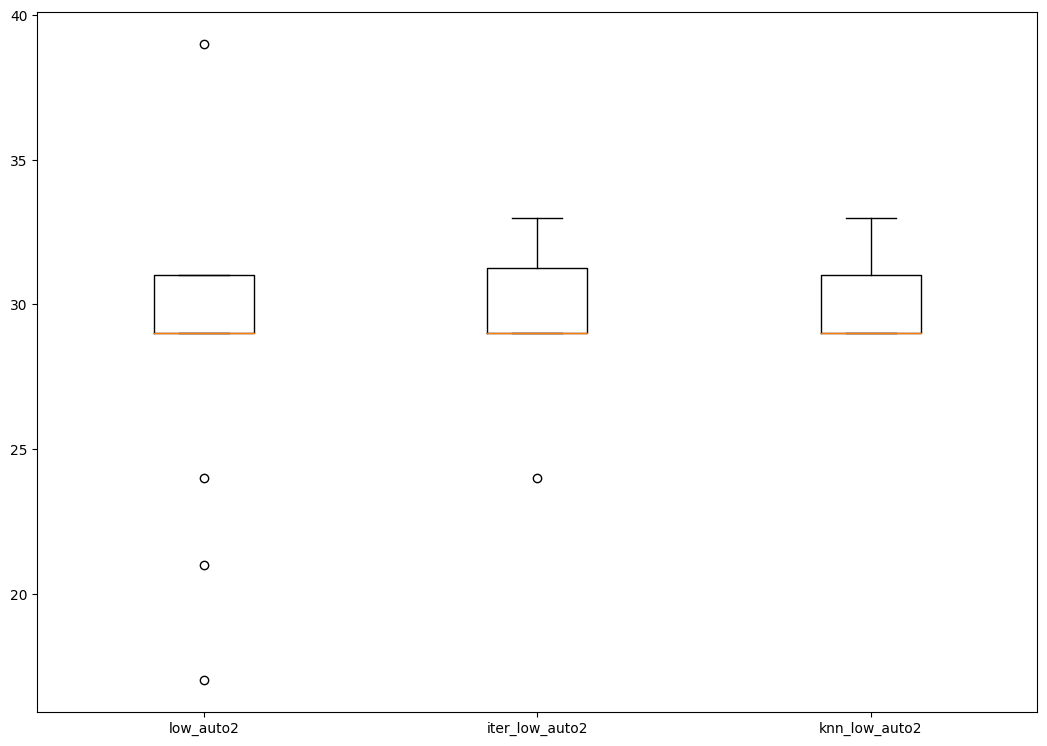

In [10]:
data = [d2,d4,d6]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])

bp = ax.boxplot(data)


plt.show()

/tmp/ipykernel_1889/1016865623.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])


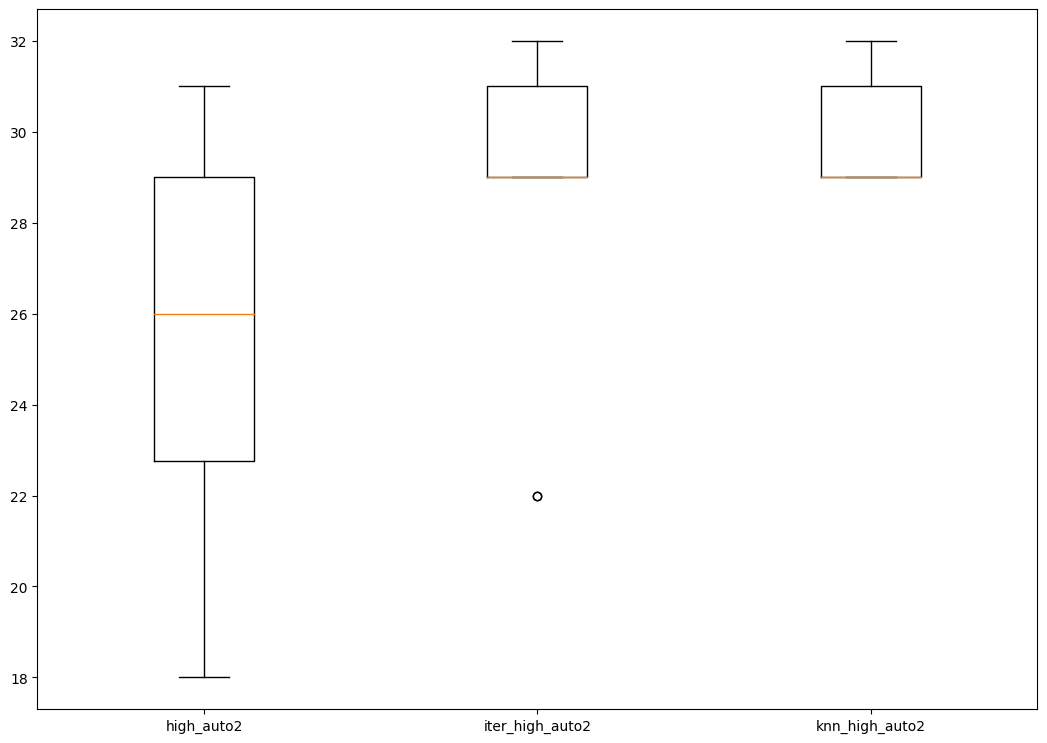

In [11]:
data = [d3,d5,d7]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])

bp = ax.boxplot(data)


plt.show()

In [12]:
d1 = auto2_data['auto2']['sway with']['Class-_mean']
d2 = auto2_data['low_auto2']['sway with']['Class-_mean']
d3 = auto2_data['high_auto2']['sway with']['Class-_mean']
d4 = auto2_data['iter_low_auto2']['sway with']['Class-_mean']
d5 = auto2_data['iter_high_auto2']['sway with']['Class-_mean']
d6 = auto2_data['knn_low_auto2']['sway with']['Class-_mean']
d7 = auto2_data['knn_high_auto2']['sway with']['Class-_mean']

/tmp/ipykernel_1889/3914002741.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])


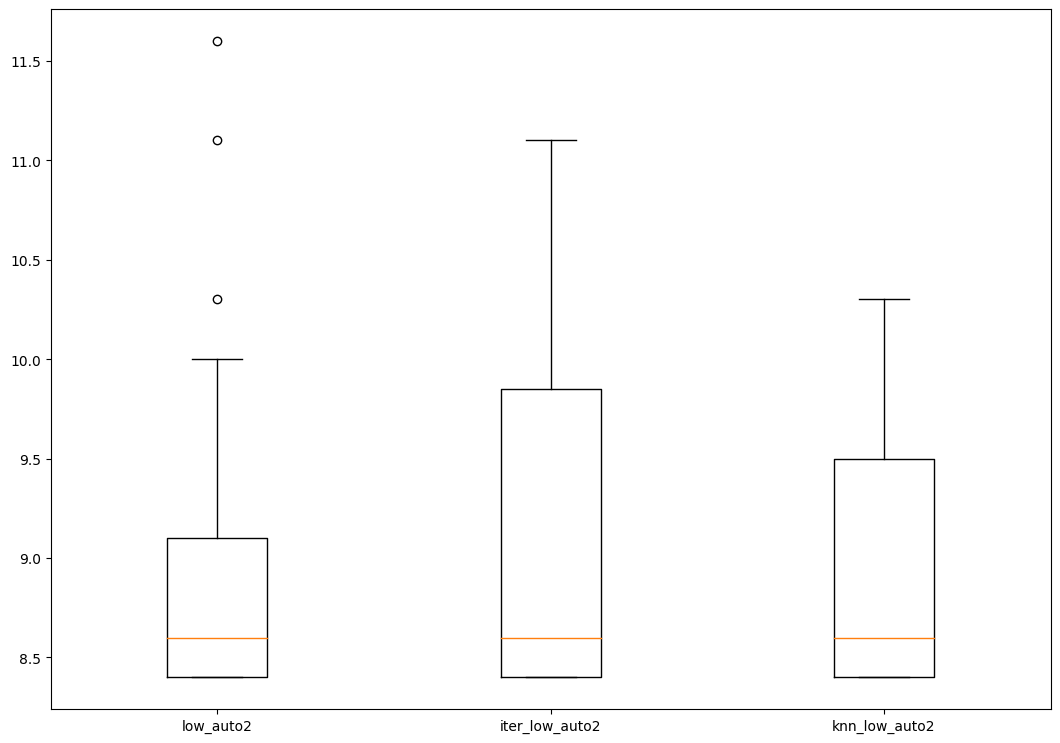

In [13]:
data = [d2,d4,d6]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['low_auto2','iter_low_auto2','knn_low_auto2'])

bp = ax.boxplot(data)


plt.show()

/tmp/ipykernel_1889/1016865623.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])


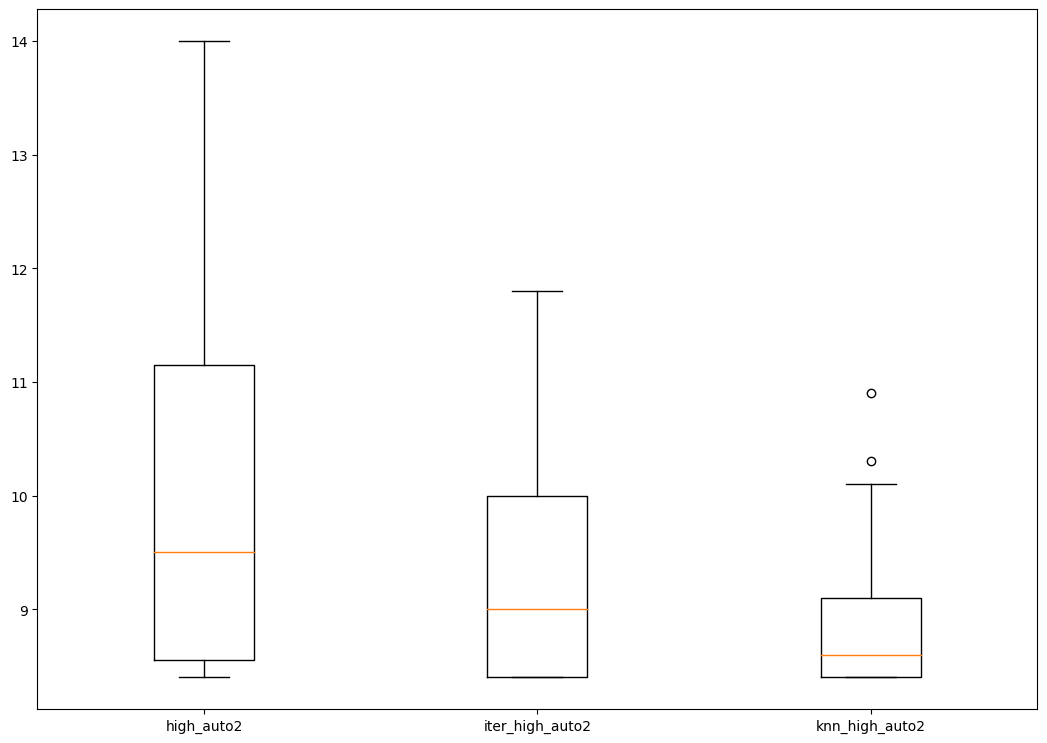

In [14]:
data = [d3,d5,d7]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['high_auto2','iter_high_auto2','knn_high_auto2'])

bp = ax.boxplot(data)


plt.show()

In [ ]:
d1 = auto2_data['auto2']['sway with']['Weight-_mean']
d2 = auto2_data['low_auto2']['sway with']['CityMPG+_mean']
d3 = auto2_data['high_auto2']['sway with']['CityMPG+_mean']
d4 = auto2_data['iter_low_auto2']['sway with']['CityMPG+_mean']
d5 = auto2_data['iter_high_auto2']['sway with']['CityMPG+_mean']
d6 = auto2_data['knn_low_auto2']['sway with']['CityMPG+_mean']
d7 = auto2_data['knn_high_auto2']['sway with']['CityMPG+_mean']

In [85]:
import numpy as np

print("Low Noise:")
print("\t\tCityMPG+\tClass-\t\tHighwayMPG+\tWeight-")
print("all\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['low_auto2']['all']['CityMPG+_mean']),
    np.mean(auto2_data['low_auto2']['all']['Class-_mean']),
    np.mean(auto2_data['low_auto2']['all']['HighwayMPG+_mean']),
    np.mean(auto2_data['low_auto2']['all']['Weight-_mean'])))

print("sway\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['low_auto2']['sway with']['CityMPG+_mean']),
    np.mean(auto2_data['low_auto2']['sway with']['Class-_mean']),
    np.mean(auto2_data['low_auto2']['sway with']['HighwayMPG+_mean']),
    np.mean(auto2_data['low_auto2']['sway with']['Weight-_mean'])))

print("xpln\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['low_auto2']['xpln on']['CityMPG+_mean']),
    np.mean(auto2_data['low_auto2']['xpln on']['Class-_mean']),
    np.mean(auto2_data['low_auto2']['xpln on']['HighwayMPG+_mean']),
    np.mean(auto2_data['low_auto2']['xpln on']['Weight-_mean'])))

print("sway+MICE\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['iter_low_auto2']['sway with']['CityMPG+_mean']),
    np.mean(auto2_data['iter_low_auto2']['sway with']['Class-_mean']),
    np.mean(auto2_data['iter_low_auto2']['sway with']['HighwayMPG+_mean']),
    np.mean(auto2_data['iter_low_auto2']['sway with']['Weight-_mean'])))

print("xpln+MICE\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['iter_low_auto2']['xpln on']['CityMPG+_mean']),
    np.mean(auto2_data['iter_low_auto2']['xpln on']['Class-_mean']),
    np.mean(auto2_data['iter_low_auto2']['xpln on']['HighwayMPG+_mean']),
    np.mean(auto2_data['iter_low_auto2']['xpln on']['Weight-_mean'])))

print("sway+KNN\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['knn_low_auto2']['sway with']['CityMPG+_mean']),
    np.mean(auto2_data['knn_low_auto2']['sway with']['Class-_mean']),
    np.mean(auto2_data['knn_low_auto2']['sway with']['HighwayMPG+_mean']),
    np.mean(auto2_data['knn_low_auto2']['sway with']['Weight-_mean'])))

print("xpln+KNN\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['knn_low_auto2']['xpln on']['CityMPG+_mean']),
    np.mean(auto2_data['knn_low_auto2']['xpln on']['Class-_mean']),
    np.mean(auto2_data['knn_low_auto2']['xpln on']['HighwayMPG+_mean']),
    np.mean(auto2_data['knn_low_auto2']['xpln on']['Weight-_mean'])))

print("top\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['low_auto2']['sort with']['CityMPG+_mean']),
    np.mean(auto2_data['low_auto2']['sort with']['Class-_mean']),
    np.mean(auto2_data['low_auto2']['sort with']['HighwayMPG+_mean']),
    np.mean(auto2_data['low_auto2']['sort with']['Weight-_mean'])))


Low Noise:
		CityMPG+	Class-		HighwayMPG+	Weight-
all		21.0		17.7		28.0		3040.0
sway		28.3		9.1		33.7		2198.2
xpln		28.8		11.2		33.4		2341.6
sway+MICE	28.9		9.1		33.5		2208.8
xpln+MICE	29.9		9.5		34.5		2231.0
sway+KNN	28.7		9.0		33.7		2187.4
xpln+KNN	30.1		9.3		34.4		2215.8
top		35.2		8.6		41.7		2045.0


Low Noise:
		CityMPG+	Class-		HighwayMPG+	Weight-
all		21.0		17.7		28.0		3040.0
sway		28.3		9.1		33.7		2198.2
xpln		28.8		11.2		33.4		2341.6
sway+MICE	28.9		9.1		33.5		2208.8
xpln+MICE	29.9		9.5		34.5		2231.0
sway+KNN	28.7		9.0		33.7		2187.4
xpln+KNN	30.1		9.3		34.4		2215.8
top		35.2		8.6		41.7		2045.0

In [86]:
def KW(list1, list2):
    import scipy.stats as stats
    pvalue = 0.05
    st,p = stats.kruskal(list1,list2)
    if p > pvalue:
        return "=="
    else: return "!="

In [87]:

print("\n\nLow Noise")
print("Kruskal-Wallis:")
print("\t\t\tCityMPG+\tClass-\t\tHighwayMPG+\tWeight-")

print('all to all\t\t==\t\t==\t\t==\t\t==')
# print("all to all\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
#     KW(auto2_data['low_auto2']['all']['CityMPG+_mean'],auto2_data['low_auto2']['all']['CityMPG+_mean']),
#     KW(auto2_data['low_auto2']['all']['Class-_mean'],auto2_data['low_auto2']['all']['Class-_mean']),
#     KW(auto2_data['low_auto2']['all']['HighwayMPG+_mean'],auto2_data['low_auto2']['all']['HighwayMPG+_mean']),
#     KW(auto2_data['low_auto2']['all']['Weight-_mean'],auto2_data['low_auto2']['all']['Weight-_mean'])))

print("all to sway\t\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['low_auto2']['all']['CityMPG+_mean'],auto2_data['low_auto2']['sway with']['CityMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Class-_mean'],auto2_data['low_auto2']['sway with']['Class-_mean']),
    KW(auto2_data['low_auto2']['all']['HighwayMPG+_mean'],auto2_data['low_auto2']['sway with']['HighwayMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Weight-_mean'],auto2_data['low_auto2']['sway with']['Weight-_mean'])))

print("all to sway+MICE\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['low_auto2']['all']['CityMPG+_mean'],auto2_data['iter_low_auto2']['sway with']['CityMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Class-_mean'],auto2_data['iter_low_auto2']['sway with']['Class-_mean']),
    KW(auto2_data['low_auto2']['all']['HighwayMPG+_mean'],auto2_data['iter_low_auto2']['sway with']['HighwayMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Weight-_mean'],auto2_data['iter_low_auto2']['sway with']['Weight-_mean'])))

print("all to sway+KNN\t\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['low_auto2']['all']['CityMPG+_mean'],auto2_data['knn_low_auto2']['sway with']['CityMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Class-_mean'],auto2_data['knn_low_auto2']['sway with']['Class-_mean']),
    KW(auto2_data['low_auto2']['all']['HighwayMPG+_mean'],auto2_data['knn_low_auto2']['sway with']['HighwayMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Weight-_mean'],auto2_data['knn_low_auto2']['sway with']['Weight-_mean'])))

print("sway to sway+MICE\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['low_auto2']['sway with']['CityMPG+_mean'],auto2_data['iter_low_auto2']['sway with']['CityMPG+_mean']),
    KW(auto2_data['low_auto2']['sway with']['Class-_mean'],auto2_data['iter_low_auto2']['sway with']['Class-_mean']),
    KW(auto2_data['low_auto2']['sway with']['HighwayMPG+_mean'],auto2_data['iter_low_auto2']['sway with']['HighwayMPG+_mean']),
    KW(auto2_data['low_auto2']['sway with']['Weight-_mean'],auto2_data['iter_low_auto2']['sway with']['Weight-_mean'])))

print("sway to sway+KNN\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['low_auto2']['sway with']['CityMPG+_mean'],auto2_data['knn_low_auto2']['sway with']['CityMPG+_mean']),
    KW(auto2_data['low_auto2']['sway with']['Class-_mean'],auto2_data['knn_low_auto2']['sway with']['Class-_mean']),
    KW(auto2_data['low_auto2']['sway with']['HighwayMPG+_mean'],auto2_data['knn_low_auto2']['sway with']['HighwayMPG+_mean']),
    KW(auto2_data['low_auto2']['sway with']['Weight-_mean'],auto2_data['knn_low_auto2']['sway with']['Weight-_mean'])))

print("all to xpln\t\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['low_auto2']['all']['CityMPG+_mean'],auto2_data['low_auto2']['xpln on']['CityMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Class-_mean'],auto2_data['low_auto2']['xpln on']['Class-_mean']),
    KW(auto2_data['low_auto2']['all']['HighwayMPG+_mean'],auto2_data['low_auto2']['xpln on']['HighwayMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Weight-_mean'],auto2_data['low_auto2']['xpln on']['Weight-_mean'])))

print("all to xpln+MICE\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['low_auto2']['all']['CityMPG+_mean'],auto2_data['iter_low_auto2']['xpln on']['CityMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Class-_mean'],auto2_data['iter_low_auto2']['xpln on']['Class-_mean']),
    KW(auto2_data['low_auto2']['all']['HighwayMPG+_mean'],auto2_data['iter_low_auto2']['xpln on']['HighwayMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Weight-_mean'],auto2_data['iter_low_auto2']['xpln on']['Weight-_mean'])))

print("all to xpln+KNN\t\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['low_auto2']['all']['CityMPG+_mean'],auto2_data['knn_low_auto2']['xpln on']['CityMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Class-_mean'],auto2_data['knn_low_auto2']['xpln on']['Class-_mean']),
    KW(auto2_data['low_auto2']['all']['HighwayMPG+_mean'],auto2_data['knn_low_auto2']['xpln on']['HighwayMPG+_mean']),
    KW(auto2_data['low_auto2']['all']['Weight-_mean'],auto2_data['knn_low_auto2']['xpln on']['Weight-_mean'])))

print("xpln to xpln+MICE\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['low_auto2']['xpln on']['CityMPG+_mean'],auto2_data['iter_low_auto2']['xpln on']['CityMPG+_mean']),
    KW(auto2_data['low_auto2']['xpln on']['Class-_mean'],auto2_data['iter_low_auto2']['xpln on']['Class-_mean']),
    KW(auto2_data['low_auto2']['xpln on']['HighwayMPG+_mean'],auto2_data['iter_low_auto2']['xpln on']['HighwayMPG+_mean']),
    KW(auto2_data['low_auto2']['xpln on']['Weight-_mean'],auto2_data['iter_low_auto2']['xpln on']['Weight-_mean'])))

print("xpln to xpln+KNN\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['low_auto2']['xpln on']['CityMPG+_mean'],auto2_data['knn_low_auto2']['xpln on']['CityMPG+_mean']),
    KW(auto2_data['low_auto2']['xpln on']['Class-_mean'],auto2_data['knn_low_auto2']['xpln on']['Class-_mean']),
    KW(auto2_data['low_auto2']['xpln on']['HighwayMPG+_mean'],auto2_data['knn_low_auto2']['xpln on']['HighwayMPG+_mean']),
    KW(auto2_data['low_auto2']['xpln on']['Weight-_mean'],auto2_data['knn_low_auto2']['xpln on']['Weight-_mean'])))

print("sway to top\t\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['low_auto2']['sway with']['CityMPG+_mean'],auto2_data['knn_low_auto2']['sort with']['CityMPG+_mean']),
    KW(auto2_data['low_auto2']['sway with']['Class-_mean'],auto2_data['knn_low_auto2']['sort with']['Class-_mean']),
    KW(auto2_data['low_auto2']['sway with']['HighwayMPG+_mean'],auto2_data['knn_low_auto2']['sort with']['HighwayMPG+_mean']),
    KW(auto2_data['low_auto2']['sway with']['Weight-_mean'],auto2_data['knn_low_auto2']['sort with']['Weight-_mean'])))



Low Noise
Kruskal-Wallis:
			CityMPG+	Class-		HighwayMPG+	Weight-
all to all		==		==		==		==
all to sway		!=		!=		!=		!=
all to sway+MICE	!=		!=		!=		!=
all to sway+KNN		!=		!=		!=		!=
sway to sway+MICE	==		==		==		==
sway to sway+KNN	==		==		==		==
all to xpln		!=		!=		!=		!=
all to xpln+MICE	!=		!=		!=		!=
all to xpln+KNN		!=		!=		!=		!=
xpln to xpln+MICE	==		==		==		==
xpln to xpln+KNN	==		==		==		==
sway to top		!=		==		!=		!=




Low Noise
Kruskal-Wallis:
			CityMPG+	Class-		HighwayMPG+	Weight-
all to all		==		==		==		==
all to sway		!=		!=		!=		!=
all to sway+MICE	!=		!=		!=		!=
all to sway+KNN		!=		!=		!=		!=
sway to sway+MICE	==		==		==		==
sway to sway+KNN	==		==		==		==
all to xpln		!=		!=		!=		!=
all to xpln+MICE	!=		!=		!=		!=
all to xpln+KNN		!=		!=		!=		!=
xpln to xpln+MICE	==		==		==		==
xpln to xpln+KNN	==		==		==		==
sway to top		!=		==		!=		!=

In [88]:
import numpy as np

print("High Noise:")
print("\t\tCityMPG+\tClass-\t\tHighwayMPG+\tWeight-")
print("all\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['high_auto2']['all']['CityMPG+_mean']),
    np.mean(auto2_data['high_auto2']['all']['Class-_mean']),
    np.mean(auto2_data['high_auto2']['all']['HighwayMPG+_mean']),
    np.mean(auto2_data['high_auto2']['all']['Weight-_mean'])))

print("sway\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['high_auto2']['sway with']['CityMPG+_mean']),
    np.mean(auto2_data['high_auto2']['sway with']['Class-_mean']),
    np.mean(auto2_data['high_auto2']['sway with']['HighwayMPG+_mean']),
    np.mean(auto2_data['high_auto2']['sway with']['Weight-_mean'])))

print("xpln\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['high_auto2']['xpln on']['CityMPG+_mean']),
    np.mean(auto2_data['high_auto2']['xpln on']['Class-_mean']),
    np.mean(auto2_data['high_auto2']['xpln on']['HighwayMPG+_mean']),
    np.mean(auto2_data['high_auto2']['xpln on']['Weight-_mean'])))

print("sway+MICE\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['iter_high_auto2']['sway with']['CityMPG+_mean']),
    np.mean(auto2_data['iter_high_auto2']['sway with']['Class-_mean']),
    np.mean(auto2_data['iter_high_auto2']['sway with']['HighwayMPG+_mean']),
    np.mean(auto2_data['iter_high_auto2']['sway with']['Weight-_mean'])))

print("xpln+MICE\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['iter_high_auto2']['xpln on']['CityMPG+_mean']),
    np.mean(auto2_data['iter_high_auto2']['xpln on']['Class-_mean']),
    np.mean(auto2_data['iter_high_auto2']['xpln on']['HighwayMPG+_mean']),
    np.mean(auto2_data['iter_high_auto2']['xpln on']['Weight-_mean'])))

print("sway+KNN\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['knn_high_auto2']['sway with']['CityMPG+_mean']),
    np.mean(auto2_data['knn_high_auto2']['sway with']['Class-_mean']),
    np.mean(auto2_data['knn_high_auto2']['sway with']['HighwayMPG+_mean']),
    np.mean(auto2_data['knn_high_auto2']['sway with']['Weight-_mean'])))

print("xpln+KNN\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['knn_high_auto2']['xpln on']['CityMPG+_mean']),
    np.mean(auto2_data['knn_high_auto2']['xpln on']['Class-_mean']),
    np.mean(auto2_data['knn_high_auto2']['xpln on']['HighwayMPG+_mean']),
    np.mean(auto2_data['knn_high_auto2']['xpln on']['Weight-_mean'])))

print("top\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
    np.mean(auto2_data['high_auto2']['sort with']['CityMPG+_mean']),
    np.mean(auto2_data['high_auto2']['sort with']['Class-_mean']),
    np.mean(auto2_data['high_auto2']['sort with']['HighwayMPG+_mean']),
    np.mean(auto2_data['high_auto2']['sort with']['Weight-_mean'])))



High Noise:
		CityMPG+	Class-		HighwayMPG+	Weight-
all		21.0		17.7		28.0		3040.0
sway		28.1		10.0		33.9		2270.8
xpln		25.8		11.8		31.3		2534.2
sway+MICE	28.8		9.4		34.4		2214.2
xpln+MICE	28.9		9.5		33.6		2249.5
sway+KNN	29.6		9.0		34.5		2189.5
xpln+KNN	30.1		9.3		34.4		2197.2
top		36.0		8.6		42.0		2045.0


High Noise:
		CityMPG+	Class-		HighwayMPG+	Weight-
all		21.0		17.7		28.0		3040.0
sway		28.1		10.0		33.9		2270.8
xpln		25.8		11.8		31.3		2534.2
sway+MICE	28.8		9.4		34.4		2214.2
xpln+MICE	28.9		9.5		33.6		2249.5
sway+KNN	29.6		9.0		34.5		2189.5
xpln+KNN	30.1		9.3		34.4		2197.2
top		36.0		8.6		42.0		2045.0

In [89]:

print("\n\nHigh Noise")
print("Kruskal-Wallis:")
print("\t\t\tCityMPG+\tClass-\t\tHighwayMPG+\tWeight-")

print('all to all\t\t==\t\t==\t\t==\t\t==')
# print("all to all\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}\t\t{:.1f}".format(
#     KW(auto2_data['high_auto2']['all']['CityMPG+_mean'],auto2_data['high_auto2']['all']['CityMPG+_mean']),
#     KW(auto2_data['high_auto2']['all']['Class-_mean'],auto2_data['high_auto2']['all']['Class-_mean']),
#     KW(auto2_data['high_auto2']['all']['HighwayMPG+_mean'],auto2_data['high_auto2']['all']['HighwayMPG+_mean']),
#     KW(auto2_data['high_auto2']['all']['Weight-_mean'],auto2_data['high_auto2']['all']['Weight-_mean'])))

print("all to sway\t\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['high_auto2']['all']['CityMPG+_mean'],auto2_data['high_auto2']['sway with']['CityMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Class-_mean'],auto2_data['high_auto2']['sway with']['Class-_mean']),
    KW(auto2_data['high_auto2']['all']['HighwayMPG+_mean'],auto2_data['high_auto2']['sway with']['HighwayMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Weight-_mean'],auto2_data['high_auto2']['sway with']['Weight-_mean'])))

print("all to sway+MICE\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['high_auto2']['all']['CityMPG+_mean'],auto2_data['iter_high_auto2']['sway with']['CityMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Class-_mean'],auto2_data['iter_high_auto2']['sway with']['Class-_mean']),
    KW(auto2_data['high_auto2']['all']['HighwayMPG+_mean'],auto2_data['iter_high_auto2']['sway with']['HighwayMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Weight-_mean'],auto2_data['iter_high_auto2']['sway with']['Weight-_mean'])))

print("all to sway+KNN\t\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['high_auto2']['all']['CityMPG+_mean'],auto2_data['knn_high_auto2']['sway with']['CityMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Class-_mean'],auto2_data['knn_high_auto2']['sway with']['Class-_mean']),
    KW(auto2_data['high_auto2']['all']['HighwayMPG+_mean'],auto2_data['knn_high_auto2']['sway with']['HighwayMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Weight-_mean'],auto2_data['knn_high_auto2']['sway with']['Weight-_mean'])))

print("sway to sway+MICE\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['high_auto2']['sway with']['CityMPG+_mean'],auto2_data['iter_high_auto2']['sway with']['CityMPG+_mean']),
    KW(auto2_data['high_auto2']['sway with']['Class-_mean'],auto2_data['iter_high_auto2']['sway with']['Class-_mean']),
    KW(auto2_data['high_auto2']['sway with']['HighwayMPG+_mean'],auto2_data['iter_high_auto2']['sway with']['HighwayMPG+_mean']),
    KW(auto2_data['high_auto2']['sway with']['Weight-_mean'],auto2_data['iter_high_auto2']['sway with']['Weight-_mean'])))

print("sway to sway+KNN\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['high_auto2']['sway with']['CityMPG+_mean'],auto2_data['knn_high_auto2']['sway with']['CityMPG+_mean']),
    KW(auto2_data['high_auto2']['sway with']['Class-_mean'],auto2_data['knn_high_auto2']['sway with']['Class-_mean']),
    KW(auto2_data['high_auto2']['sway with']['HighwayMPG+_mean'],auto2_data['knn_high_auto2']['sway with']['HighwayMPG+_mean']),
    KW(auto2_data['high_auto2']['sway with']['Weight-_mean'],auto2_data['knn_high_auto2']['sway with']['Weight-_mean'])))


print("all to xpln\t\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['high_auto2']['all']['CityMPG+_mean'],auto2_data['high_auto2']['xpln on']['CityMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Class-_mean'],auto2_data['high_auto2']['xpln on']['Class-_mean']),
    KW(auto2_data['high_auto2']['all']['HighwayMPG+_mean'],auto2_data['high_auto2']['xpln on']['HighwayMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Weight-_mean'],auto2_data['high_auto2']['xpln on']['Weight-_mean'])))

print("all to xpln+MICE\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['high_auto2']['all']['CityMPG+_mean'],auto2_data['iter_high_auto2']['xpln on']['CityMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Class-_mean'],auto2_data['iter_high_auto2']['xpln on']['Class-_mean']),
    KW(auto2_data['high_auto2']['all']['HighwayMPG+_mean'],auto2_data['iter_high_auto2']['xpln on']['HighwayMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Weight-_mean'],auto2_data['iter_high_auto2']['xpln on']['Weight-_mean'])))

print("all to xpln+KNN\t\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['high_auto2']['all']['CityMPG+_mean'],auto2_data['knn_high_auto2']['xpln on']['CityMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Class-_mean'],auto2_data['knn_high_auto2']['xpln on']['Class-_mean']),
    KW(auto2_data['high_auto2']['all']['HighwayMPG+_mean'],auto2_data['knn_high_auto2']['xpln on']['HighwayMPG+_mean']),
    KW(auto2_data['high_auto2']['all']['Weight-_mean'],auto2_data['knn_high_auto2']['xpln on']['Weight-_mean'])))

print("xpln to xpln+MICE\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['high_auto2']['xpln on']['CityMPG+_mean'],auto2_data['iter_high_auto2']['xpln on']['CityMPG+_mean']),
    KW(auto2_data['high_auto2']['xpln on']['Class-_mean'],auto2_data['iter_high_auto2']['xpln on']['Class-_mean']),
    KW(auto2_data['high_auto2']['xpln on']['HighwayMPG+_mean'],auto2_data['iter_high_auto2']['xpln on']['HighwayMPG+_mean']),
    KW(auto2_data['high_auto2']['xpln on']['Weight-_mean'],auto2_data['iter_high_auto2']['xpln on']['Weight-_mean'])))

print("xpln to xpln+KNN\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['high_auto2']['xpln on']['CityMPG+_mean'],auto2_data['knn_high_auto2']['xpln on']['CityMPG+_mean']),
    KW(auto2_data['high_auto2']['xpln on']['Class-_mean'],auto2_data['knn_high_auto2']['xpln on']['Class-_mean']),
    KW(auto2_data['high_auto2']['xpln on']['HighwayMPG+_mean'],auto2_data['knn_high_auto2']['xpln on']['HighwayMPG+_mean']),
    KW(auto2_data['high_auto2']['xpln on']['Weight-_mean'],auto2_data['knn_high_auto2']['xpln on']['Weight-_mean'])))

print("sway to top\t\t{}\t\t{}\t\t{}\t\t{}".format(
    KW(auto2_data['high_auto2']['sway with']['CityMPG+_mean'],auto2_data['knn_high_auto2']['sort with']['CityMPG+_mean']),
    KW(auto2_data['high_auto2']['sway with']['Class-_mean'],auto2_data['knn_high_auto2']['sort with']['Class-_mean']),
    KW(auto2_data['high_auto2']['sway with']['HighwayMPG+_mean'],auto2_data['knn_high_auto2']['sort with']['HighwayMPG+_mean']),
    KW(auto2_data['high_auto2']['sway with']['Weight-_mean'],auto2_data['knn_high_auto2']['sort with']['Weight-_mean'])))



High Noise
Kruskal-Wallis:
			CityMPG+	Class-		HighwayMPG+	Weight-
all to all		==		==		==		==
all to sway		!=		!=		!=		!=
all to sway+MICE	!=		!=		!=		!=
all to sway+KNN		!=		!=		!=		!=
sway to sway+MICE	==		==		==		==
sway to sway+KNN	==		==		==		==
all to xpln		!=		!=		!=		!=
all to xpln+MICE	!=		!=		!=		!=
all to xpln+KNN		!=		!=		!=		!=
xpln to xpln+MICE	!=		!=		!=		!=
xpln to xpln+KNN	!=		!=		!=		!=
sway to top		!=		!=		!=		!=


High Noise
Kruskal-Wallis:
				CityMPG+	Class-	HighwayMPG+		Weight-
all to all			==		==		==		==
all to sway			!=		!=		!=		!=
all to sway+MICE	!=		!=		!=		!=
all to sway+KNN		!=		!=		!=		!=
sway to sway+MICE	==		==		==		==
sway to sway+KNN	==		==		==		==
all to xpln			!=		!=		!=		!=
all to xpln+MICE	!=		!=		!=		!=
all to xpln+KNN		!=		!=		!=		!=
xpln to xpln+MICE	!=		!=		!=		!=
xpln to xpln+KNN	!=		!=		!=		!=
sway to top			!=		!=		!=		!=

In [90]:
def MWU(list1, list2):
    import scipy.stats as stats
    pvalue = 0.05
    st,p = stats.mannwhitneyu(list1,list2)
    if p > pvalue:
        return "=="
    else: return "!="

In [91]:
from statsmodels.stats.multitest import multipletests
import scipy.stats as stats

def run_stats(data):
    # Perform Kruskal-Wallis test
    _, p_value = stats.kruskal(*data.values())
    print(f"Kruskal-Wallis test p-value: {p_value}")

    if p_value < 0.05:
        # Calculate medians for each group
        group_medians = {key: np.median(val) for key, val in data.items()}
        print(f"Group medians: {group_medians}")

        # Find the group with the largest median
        max_group = max(group_medians, key=group_medians.get)
        print(f"Group with the largest median: {max_group}")

        # Perform pairwise Mann-Whitney U tests
        groups = list(data.keys())
        num_groups = len(groups)
        p_values = np.zeros((num_groups, num_groups))

        for i in range(num_groups):
            for j in range(i+1, num_groups):
                _, p = stats.mannwhitneyu(data[groups[i]], data[groups[j]], alternative='two-sided')
                p_values[i, j] = p
                p_values[j, i] = p

        print('Pairwise Mann-Whitney U tests')
        print(pd.DataFrame(p_values, index=groups, columns=groups))
        print()

        # Apply Bonferroni correction for multiple comparisons
        adjusted_p_values = multipletests(p_values.ravel(), method='fdr_bh')[1].reshape(p_values.shape)
        post_hoc = pd.DataFrame(adjusted_p_values, index=groups, columns=groups)

        print("Pairwise Mann-Whitney U tests with Benjamini/Hochberg correction:")
        print(post_hoc)
        print()

        # Check if the group with the largest median is significantly better than the others
        significantly_better = True
        for key in data.keys():
            if key != max_group and post_hoc.loc[max_group, key] >= 0.05:
                significantly_better = False
                break

        if significantly_better:
            print(f"The group '{max_group}' with the largest median IS significantly better than the others, ", end='')
        else:
            print("The group with the largest median IS NOT significantly better than all the others, ", end='')
        
        print(f'and the highest p-value is {round(max(post_hoc[max_group]), 2)}')
    else:
        print("There is no significant difference among the groups.")

In [127]:
from statsmodels.stats.multitest import multipletests
import scipy.stats as stats
import pandas as pd
def run_stats(data):
    # # Perform Kruskal-Wallis test
    # _, p_value = stats.kruskal(*data.values())
    # print(f"Kruskal-Wallis test p-value: {p_value}")

    # Calculate medians for each group
    medians = []
    for d in data:
        medians.append(np.median(d))
    print(f"Group medians: {medians}")

    # Find the group with the largest median
    max_group = 'knn_high'
    print(f"Group with the largest median: {max_group}")

    # Perform pairwise Mann-Whitney U tests
    groups = ['high','iter_high','knn_high']
    num_groups = len(groups)
    p_values = np.zeros((num_groups, num_groups))

    for i in range(num_groups):
        for j in range(i+1, num_groups):
            _, p = stats.mannwhitneyu(data[i], data[j], alternative='two-sided')
            p_values[i, j] = p
            p_values[j, i] = p

    print('Pairwise Mann-Whitney U tests')
    print(pd.DataFrame(p_values, index=groups, columns=groups))
    print()

    # Apply Bonferroni correction for multiple comparisons
    adjusted_p_values = multipletests(p_values.ravel(), method='fdr_bh')[1].reshape(p_values.shape)
    post_hoc = pd.DataFrame(adjusted_p_values, index=groups, columns=groups)

    print("Pairwise Mann-Whitney U tests with Benjamini/Hochberg correction:")
    print(post_hoc)
    print()

    # Check if the group with the largest median is significantly better than the others
    significantly_better = True
    for key in groups:
        if key != max_group and post_hoc.loc[max_group, key] >= 0.05:
            significantly_better = False
            break

    if significantly_better:
        print(f"The group '{max_group}' with the largest median IS significantly better than the others, ", end='')
    else:
        print("The group with the largest median IS NOT significantly better than all the others, ", end='')
    
    print(f'and the highest p-value is {round(max(post_hoc[max_group]), 5)}')

In [130]:
d1 = auto2_data['auto2']['sway with']['Weight-_mean']
d2 = auto2_data['low_auto2']['sway with']['CityMPG+_mean']
d3 = auto2_data['high_auto2']['xpln on']['Weight-_mean']
d4 = auto2_data['iter_low_auto2']['sway with']['CityMPG+_mean']
d5 = auto2_data['iter_high_auto2']['xpln on']['Weight-_mean']
d6 = auto2_data['knn_low_auto2']['sway with']['CityMPG+_mean']
d7 = auto2_data['knn_high_auto2']['xpln on']['Weight-_mean']

run_stats([d3,d5,d7])

Group medians: [2400.0, 2345.0, 2267.5]
Group with the largest median: knn_high
Pairwise Mann-Whitney U tests
               high  iter_high  knn_high
high       0.000000   0.013156  0.000404
iter_high  0.013156   0.000000  0.036590
knn_high   0.000404   0.036590  0.000000

Pairwise Mann-Whitney U tests with Benjamini/Hochberg correction:
               high  iter_high  knn_high
high       0.000000   0.016915  0.000727
iter_high  0.016915   0.000000  0.036590
knn_high   0.000727   0.036590  0.000000

The group 'knn_high' with the largest median IS significantly better than the others, and the highest p-value is 0.03659



## Xpln on CityMPG+:

Group medians: [29.0, 29.0, 29.0]
Group with the largest median: high
Pairwise Mann-Whitney U tests
               high  iter_high  knn_high
high       0.000000   0.912009  0.257678
iter_high  0.912009   0.000000  0.224316
knn_high   0.257678   0.224316  0.000000

Pairwise Mann-Whitney U tests with Benjamini/Hochberg correction:
               high  iter_high  knn_high
high       0.000000   0.912009    0.3313
iter_high  0.912009   0.000000    0.3313
knn_high   0.331300   0.331300    0.0000

The group with the largest median IS NOT significantly better than all the others, and the highest p-value is 0.3313

## Xpln on Class-:

Group medians: [11.0, 10.0, 9.45]
Group with the largest median: knn_high
Pairwise Mann-Whitney U tests
               high  iter_high  knn_high
high       0.000000   0.001386  0.000478
iter_high  0.001386   0.000000  0.444691
knn_high   0.000478   0.444691  0.000000

Pairwise Mann-Whitney U tests with Benjamini/Hochberg correction:
               high  iter_high  knn_high
high       0.000000   0.001783  0.000860
iter_high  0.001783   0.000000  0.444691
knn_high   0.000860   0.444691  0.000000

The group with the largest median IS NOT significantly better than all the others, and the highest p-value is 0.44469

## Xpln on HighwayMPG+:

Group medians: [33.0, 33.0, 33.0]
Group with the largest median: knn_high
Pairwise Mann-Whitney U tests
               high  iter_high  knn_high
high       0.000000   0.006621  0.000272
iter_high  0.006621   0.000000  0.301274
knn_high   0.000272   0.301274  0.000000

Pairwise Mann-Whitney U tests with Benjamini/Hochberg correction:
               high  iter_high  knn_high
high       0.000000   0.008512  0.000489
iter_high  0.008512   0.000000  0.301274
knn_high   0.000489   0.301274  0.000000

The group with the largest median IS NOT significantly better than all the others, and the highest p-value is 0.30127

## Xpln on Weight-:

Group medians: [2400.0, 2345.0, 2267.5]
Group with the largest median: knn_high
Pairwise Mann-Whitney U tests
               high  iter_high  knn_high
high       0.000000   0.013156  0.000404
iter_high  0.013156   0.000000  0.036590
knn_high   0.000404   0.036590  0.000000

Pairwise Mann-Whitney U tests with Benjamini/Hochberg correction:
               high  iter_high  knn_high
high       0.000000   0.016915  0.000727
iter_high  0.016915   0.000000  0.036590
knn_high   0.000727   0.036590  0.000000

The group 'knn_high' with the largest median IS significantly better than the others, and the highest p-value is 0.03659

High Noise:
        CityMPG+        Class-      HighwayMPG+     Weight-
xplns   [x]             [x]         [x]             [xpln+KNN]